<a href="https://colab.research.google.com/github/Denis-Yen/DataScience/blob/main/7_Los_K_vecinos_mas_cercanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbors

Los k-vecinos que estan más cercan deciden.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

## Limpieza de datos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/breast-cancer-wisconsin.data.txt",
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.columns = ["name", "V1", "V2","V3","V4","V5","V6","V7","V8","V9","class"]
df.head()

,name,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df = df.drop(["name"],1) # borramos la columna name, especificado toda ala oclumna (1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.replace("?", -99999, inplace=True) # inplace reemplazo directamente

tenemos strings en los datos(?) tenemos que reemplazarlos, con un numero muy negativo para que el algoritmo no tenga con quien clasificarlo

In [ ]:
Y = df["class"]
X = df[["V1", "V2","V3","V4","V5","V6","V7","V8","V9"]]

In [ ]:
Y.head() # 2 Tumor benigno, tumos maligno 4

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

## Clasificador de los K vecinos

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [ ]:
clf = neighbors.KNeighborsClassifier()

In [ ]:
# Entrenamos el modelo
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy = clf.score(X_test, Y_test)
accuracy

0.9571428571428572

El algortimo ah clasificado muy alto.

## Clasificación sin limpieza

Vamos a verificar que ocurre con el algortimo sin limpieza de datos. se tomrá en cuenta  la columna name


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/breast-cancer-wisconsin.data.txt",
                 header=None)
df.replace("?", -99999, inplace=True) # inplace reemplazo directamente
df.columns = ["name", "V1", "V2","V3","V4","V5","V6","V7","V8","V9","class"]

Y = df["class"]
X = df[["name","V1", "V2","V3","V4","V5","V6","V7","V8","V9"]]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, Y_train)

accuracy = clf.score(X_test, Y_test)
accuracy


0.6071428571428571

In [ ]:
# Creando el modelo desde 0

# Leemos los datos
df = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/breast-cancer-wisconsin.data.txt",
                 header=None)
# limpiamos los datos ya que existe un dato string 
df.replace("?",-999999, inplace=True)

# cambiamos los nombres a las columnas
df.columns = ["name", "V1", "V2","V3","V4","V5","V6","V7","V8","V9","class"]
           
# Seleccionamos nuestra variable target y features
Y = df["class"]
X = df[["V1", "V2","V3","V4","V5","V6","V7","V8","V9","class"]]

# Creamos nuestro conjunto de entrenamiento y testing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,  test_size=0.33, random_state = 42)

# Entrenamos el modelo
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, Y_train)


In [ ]:
clf.score(X_test, Y_test)

:o La eficacia del modelo baja demasiado.

## Clasificar nuevos datos

In [ ]:
sample_measure = np.array([4,2,1,1,1,2,3,2,1])
sample_measure = sample_measure.reshape(1,-1)

In [ ]:
predict = clf.predict(sample_measure)
predict # me da predcción de benigno

array([2])

In [ ]:
sample_measure2 = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,1,1,2,3,2,1]]).reshape(2,-1)


In [ ]:
predict2 = clf.predict(sample_measure2)
predict2

array([2, 2])

# Creando nuestro KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [ ]:

dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

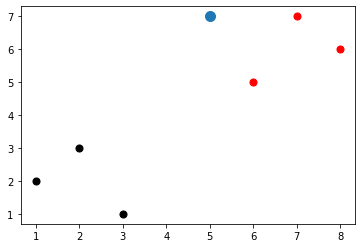

In [ ]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100)

In [ ]:
def k_nearest_neighbors(data, predict, k = 3, verbose = False):
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum((np.array(feature) - np.array(predict))**2))
            d = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([d, group])
    if verbose:
        print(distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]#sorted ordena por la primera columna
    if verbose:
        print(votes)
    
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print(vote_result)
    
    
    return vote_result[0][0]#[('r',2), ('k', 1)]

In [ ]:
new_point = [4,4.5]
result = k_nearest_neighbors(dataset, [new_point])
result

'k'

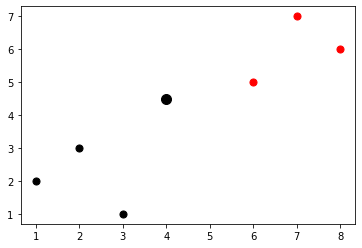

In [ ]:
[[plt.scatter(ii[0],ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0],new_point[1], s = 100, color=result)

## Aplicando nuestro KNN al Dataset del Cancer


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/breast-cancer-wisconsin.data.txt",
                 header=None)
df.replace("?", -99999, inplace=True) # inplace reemplazo directamente
df.columns = ["name", "V1", "V2","V3","V4","V5","V6","V7","V8","V9","class"]
df.drop(["name"],1 , inplace = True)


In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
full_data = df.astype(float).values.tolist()
full_data

In [ ]:
import random

In [ ]:
random.shuffle(full_data)

In [ ]:
test_size = 0.2

In [ ]:
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

In [ ]:
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[:-int(test_size*len(full_data)):]

In [ ]:
for i in train_data:
  train_set[i[-1]].append(i[:-1])

for i in test_data:
  test_set[i[-1]].append(i[:-1])

In [ ]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k = 5)
        if group == vote:
            correct += 1
        total +=1
print("Eficacia del KNN = ",correct/total)

Eficacia del KNN =  0.9767857142857143
